In [ ]:
# lets try a long short term memory neural network. 
# why this and not a simple RNN? because our data is sequential and the data has a temporal relationship
# meaning, each sequence (line) has a relationship with the sequence before and after
# they arent just loose datapoints, they are very much related
# also, simple RNN cant handle long sequences, and we know from the last models that the longest sentence is more than 200 words
# LSTM can handle this, i believe

In [ ]:
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

# to get reproducible results:
np.random.seed(1234)
tf.random.set_seed(1234)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving The-Office-Lines-V4.csv to The-Office-Lines-V4.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['The-Office-Lines-V4.csv']))

In [ ]:
df = pd.read_csv('The-Office-Lines-V4.csv')

In [ ]:
df= df.drop('Unnamed: 6', 1)

def gender(name):
    if name == 'Michael' or name == 'Jim' or name == 'Dwight' or name == 'Ryan' or name == 'Stanley' or name == 'Kevin' or name == 'Oscar' or name == 'Toby' or name == 'Creed' or name == 'Andy' or name == 'Roy' or name == 'Darryl' or name == 'Gabe' or name == 'Robert California' or name == 'Robert' or name == 'Clark' or name == 'Pete':
        return 0
    elif name == 'Pam' or name == 'Phyllis' or name == 'Angela' or name == 'Kelly' or name == 'Meredith' or name == 'Jan' or name == 'Erin' or name == 'Nellie':
        return 1
    
df["gender"] = df["speaker"].map(gender)

df = df.dropna()

df['gender'] = df['gender'].astype(int)

df['number_of_words'] = df['line'].str.split().str.len()

df['speaker_id'] = pd.factorize(df.speaker)[0]

In [ ]:
df

,season,episode,title,scene,speaker,line,gender,number_of_words,speaker_id
0,1,1,Pilot,1,Michael,All right Jim. Your quarterlies look very good...,0,14,0
1,1,1,Pilot,1,Jim,"Oh, I told you. I couldn't close it. So...",0,9,1
2,1,1,Pilot,1,Michael,So you've come to the master for guidance? Is ...,0,14,0
3,1,1,Pilot,1,Jim,"Actually, you called me in here, but yeah.",0,8,1
4,1,1,Pilot,1,Michael,"All right. Well, let me show you how it's done.",0,10,0
...,...,...,...,...,...,...,...,...,...
54621,9,24,Finale,8153,Creed,It all seems so very arbitrary. I applied for ...,0,55,16
54622,9,24,Finale,8154,Meredith,I just feel lucky that I got a chance to share...,1,41,14
54623,9,24,Finale,8155,Phyllis,I'm happy that this was all filmed so I can re...,1,31,5
54624,9,24,Finale,8156,Jim,I sold paper at this company for 12 years. My ...,0,46,1


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df['line']
y = df['speaker_id']
num_classes = len(pd.unique(df['speaker_id']))

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=42, test_size=.33)

In [ ]:
X_test, X_val, y_test, y_val = train_test_split(X_train, y_train, test_size=0.5, random_state=42)

In [ ]:
print(len(X_train))
print(len(X_test))

print(len(X_val))
print(len(y_val))

print(len(y_train))
print(len(y_test))


31934
15967
15967
15967
31934
15967


In [ ]:
# padding: not all lines are the same length, but they have to be the same length for NN; padding will fix this
# do this for train, test and val sets
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

lines_Xtrain = list(X_train)
lines_Xval = list(X_val)
lines_Xtest = list(X_test)

# there will be a max length of line (maxlen), which should be the length of the longest sentence. this number should be the same in all sets
longest_line_Xtrain = (max(lines_Xtrain, key=len))
maxlen_Xtrain = len(longest_line_Xtrain.split())

# longest_line_Xval = (max(lines_Xval, key=len))
maxlen_Xval = maxlen_Xtrain
# len(longest_line_Xval.split())

# longest_line_Xtest = (max(lines_Xtest, key=len))
maxlen_Xtest = maxlen_Xtrain
# len(longest_line_Xtest.split())

# only 1000 most frequent words & oov_token so any unknown word in test set wont just be thrown away, but will be replaced by token we choose
tokenizer = Tokenizer(num_words = 10000, oov_token="<OOV>")
tokenizer.fit_on_texts(lines_Xtrain)
word_index = tokenizer.word_index

sequences_Xtrain = tokenizer.texts_to_sequences(lines_Xtrain)
sequences_Xval = tokenizer.texts_to_sequences(lines_Xval)
sequences_Xtest = tokenizer.texts_to_sequences(lines_Xtest)


# default padding is pre, so zeros will occur before ints
padded_Xtrain = pad_sequences(sequences_Xtrain, maxlen = maxlen_Xtrain)
padded_Xval = pad_sequences(sequences_Xval, maxlen = maxlen_Xval)
padded_Xtest = pad_sequences(sequences_Xtest, maxlen = maxlen_Xtest)

print("\n Padded sequences train: \n", padded_Xtrain)
print("\n Padded sequences val: \n", padded_Xval)
print("\n Padded sequences test: \n", padded_Xtest)

# now each row in the matrix is a line with the same length, and oov_token specifiec out-of-vocabulary tokens that arent recognized
# also, only 10 000 most frequent words are included



 Padded sequences train: 
 [[   0    0    0 ...    3  986   17]
 [   0    0    0 ...    0    0 8198]
 [   0    0    0 ...   78  668  213]
 ...
 [   0    0    0 ...   38   12  594]
 [   0    0    0 ...   19  145 4544]
 [   0    0    0 ...   35   34 1509]]

 Padded sequences val: 
 [[   0    0    0 ...   25   14   68]
 [   0    0    0 ...   27   23  591]
 [   0    0    0 ...   46    7 1343]
 ...
 [   0    0    0 ...  651  704  690]
 [   0    0    0 ...    2   76  232]
 [   0    0    0 ...    9   56   15]]

 Padded sequences test: 
 [[   0    0    0 ...  584    3   68]
 [   0    0    0 ...    0    0 3819]
 [   0    0    0 ...  289  180  455]
 ...
 [   0    0    0 ...    0    0 4679]
 [   0    0    0 ...    0    0   45]
 [   0    0    0 ...    0  391 5887]]


In [ ]:
# data should be float32, not int. goes for output too
# also everything should be a numpy array
y_train = np.asarray(y_train).astype('float32')
y_val = np.asarray(y_val).astype('float32')
y_test = np.asarray(y_test).astype('float32') 
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(31934,)
(15967,)
(15967,)


In [ ]:
from tensorflow.keras.utils import to_categorical 
Y_train = to_categorical(y_train, num_classes=num_classes)
Y_val = to_categorical(y_val, num_classes=num_classes)
Y_test = to_categorical(y_test, num_classes=num_classes)

print(y_train.shape)
print(Y_train.shape)

print(y_train[:10])
print(Y_train[:10, :])

(31934,)
(31934, 25)
[ 3.  1.  3.  3.  0.  9.  0. 17.  0.  1.]
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
  0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]]


In [ ]:
# now create LSTM model
from keras.layers import LSTM
model = keras.models.Sequential()
model.add(keras.layers.Embedding(50000, maxlen_Xtrain)) #limiting to 50 000 words
model.add(keras.layers.LSTM(100)) # 100 memory units
model.add(keras.layers.Dense(num_classes, activation='softmax')) # softmax activation for multi-class classification
model.summary()
# large model as we can see from the params

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 232)         11600000  
                                                                 
 lstm (LSTM)                 (None, 100)               133200    
                                                                 
 dense (Dense)               (None, 25)                2525      
                                                                 
Total params: 11,735,725
Trainable params: 11,735,725
Non-trainable params: 0
_________________________________________________________________


In [ ]:
sgd = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
# cat crossentropy bc its multiclass, adam because that worked best in last model

In [ ]:
num_epochs = 20
history = model.fit(padded_Xtrain, Y_train, epochs=num_epochs,
                     validation_data=(padded_Xval, Y_val), batch_size=100)

Epoch 1/20
320/320 [==============================] - 29s 73ms/step - loss: 2.5821 - accuracy: 0.2220 - val_loss: 2.4883 - val_accuracy: 0.2360
Epoch 2/20
320/320 [==============================] - 23s 71ms/step - loss: 2.4477 - accuracy: 0.2697 - val_loss: 2.2591 - val_accuracy: 0.3501
Epoch 3/20
320/320 [==============================] - 25s 79ms/step - loss: 2.2399 - accuracy: 0.3409 - val_loss: 2.0062 - val_accuracy: 0.4165
Epoch 4/20
320/320 [==============================] - 23s 71ms/step - loss: 2.0209 - accuracy: 0.3956 - val_loss: 1.7708 - val_accuracy: 0.4741
Epoch 5/20
320/320 [==============================] - 23s 71ms/step - loss: 1.8218 - accuracy: 0.4500 - val_loss: 1.6011 - val_accuracy: 0.5308
Epoch 6/20
320/320 [==============================] - 23s 70ms/step - loss: 1.6534 - accuracy: 0.4937 - val_loss: 1.4447 - val_accuracy: 0.5679
Epoch 7/20
320/320 [==============================] - 23s 71ms/step - loss: 1.5156 - accuracy: 0.5308 - val_loss: 1.3210 - val_accuracy:

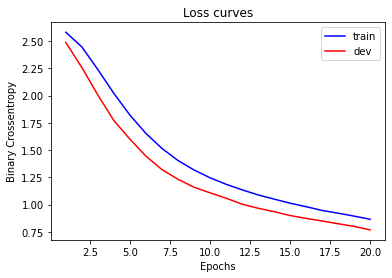

In [ ]:
train_loss = history.history['loss']
dev_loss = history.history['val_loss']

epochs = range(1, len(dev_loss) + 1)

plt.plot(epochs, train_loss, 'b', label='train')
plt.plot(epochs, dev_loss, 'r', label='dev')
plt.title('Loss curves')
plt.xlabel('Epochs')
plt.ylabel('Binary Crossentropy')
plt.legend()
plt.show()

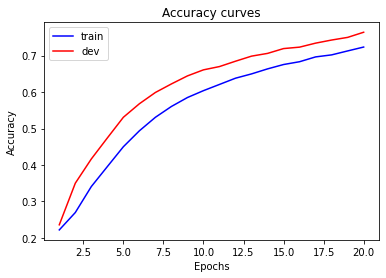

In [ ]:
train_accuracy = history.history['accuracy']
dev_accuracy = history.history['val_accuracy']
plt.clf() 
plt.plot(epochs, train_accuracy, 'b', label='train')
plt.plot(epochs, dev_accuracy, 'r', label='dev')
plt.title('Accuracy curves')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# appears that we can still improve quite a bit

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Embedding(50000, maxlen_Xtrain)) #limiting to 50 000 words
model.add(keras.layers.LSTM(100)) # 100 memory units
model.add(keras.layers.Dense(500, activation='relu', name='hidden'))
model.add(keras.layers.Dense(num_classes, activation='softmax')) # softmax activation for multi-class classification
model.summary()
# this model is a bit larger

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 232)         11600000  
                                                                 
 lstm_1 (LSTM)               (None, 100)               133200    
                                                                 
 hidden (Dense)              (None, 500)               50500     
                                                                 
 dense_1 (Dense)             (None, 25)                12525     
                                                                 
Total params: 11,796,225
Trainable params: 11,796,225
Non-trainable params: 0
_________________________________________________________________


In [ ]:
sgd = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [ ]:
num_epochs = 40 # lets try some more epochs too and see what it does
history = model.fit(padded_Xtrain, Y_train, epochs=num_epochs,
                     validation_data=(padded_Xval, Y_val), batch_size=100)

Epoch 1/40
320/320 [==============================] - 26s 74ms/step - loss: 2.5796 - accuracy: 0.2227 - val_loss: 2.4596 - val_accuracy: 0.2391
Epoch 2/40
320/320 [==============================] - 23s 71ms/step - loss: 2.4377 - accuracy: 0.2668 - val_loss: 2.2579 - val_accuracy: 0.3376
Epoch 3/40
320/320 [==============================] - 23s 71ms/step - loss: 2.2558 - accuracy: 0.3326 - val_loss: 2.0449 - val_accuracy: 0.4046
Epoch 4/40
320/320 [==============================] - 23s 70ms/step - loss: 2.0489 - accuracy: 0.3920 - val_loss: 1.7793 - val_accuracy: 0.4764
Epoch 5/40
320/320 [==============================] - 23s 71ms/step - loss: 1.8323 - accuracy: 0.4489 - val_loss: 1.5631 - val_accuracy: 0.5392
Epoch 6/40
320/320 [==============================] - 23s 71ms/step - loss: 1.6457 - accuracy: 0.4960 - val_loss: 1.4193 - val_accuracy: 0.5721
Epoch 7/40
320/320 [==============================] - 23s 71ms/step - loss: 1.4908 - accuracy: 0.5374 - val_loss: 1.2980 - val_accuracy:

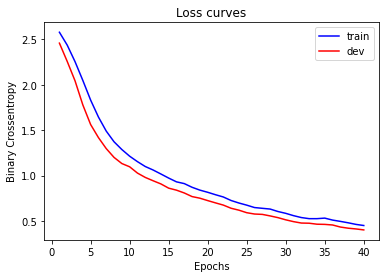

In [ ]:
train_loss = history.history['loss']
dev_loss = history.history['val_loss']

epochs = range(1, len(dev_loss) + 1)

plt.plot(epochs, train_loss, 'b', label='train')
plt.plot(epochs, dev_loss, 'r', label='dev')
plt.title('Loss curves')
plt.xlabel('Epochs')
plt.ylabel('Binary Crossentropy')
plt.legend()
plt.show()

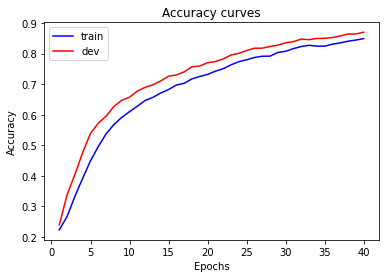

In [ ]:
train_accuracy = history.history['accuracy']
dev_accuracy = history.history['val_accuracy']
plt.clf() 
plt.plot(epochs, train_accuracy, 'b', label='train')
plt.plot(epochs, dev_accuracy, 'r', label='dev')
plt.title('Accuracy curves')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# better convergence and better scores! accuracy +.10 and loss -.36

In [ ]:
Y_pred = model.predict(padded_Xtest, batch_size=100)
print(Y_pred.shape)

(15967, 25)


In [ ]:
y_pred = np.argmax(Y_pred, axis=1)
y_pred

array([19,  0, 14, ..., 15,  0,  0])

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
print(accuracy_score(y_true=y_test, y_pred=y_pred))
print(f1_score(y_true=y_test, y_pred=y_pred, average='macro'))
print(classification_report(y_true=y_test, y_pred=y_pred))

0.8622158201290161
0.8793262635894881
              precision    recall  f1-score   support

         0.0       0.78      0.94      0.85      3597
         1.0       0.81      0.85      0.83      2131
         2.0       0.85      0.82      0.84      1619
         3.0       0.93      0.87      0.90      2241
         4.0       0.94      0.78      0.86       251
         5.0       0.90      0.84      0.87       341
         6.0       0.93      0.86      0.89       232
         7.0       0.95      0.80      0.87       449
         8.0       0.87      0.83      0.85       527
         9.0       0.92      0.81      0.86       489
        10.0       0.93      0.79      0.86       397
        11.0       0.98      0.72      0.83        71
        12.0       0.93      0.79      0.86       282
        13.0       0.92      0.86      0.89       257
        14.0       0.96      0.85      0.90       184
        15.0       0.94      0.84      0.89       403
        16.0       0.96      0.89      0.93